## Generating Pseudo Data
- Choose distribution
- Choose parameters for dist
    - Distribution dependent
    - Representation
        - Point clouds
        - Time series (Is this really different?)
- Create clusters with multiple params?
    - Labelled

In [98]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import interpolation
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

In [2]:
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

In [3]:
plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2}),
    (aniso, {'eps': .15, 'n_neighbors': 2}),
    (blobs, {}),
    (no_structure, {})]

In [158]:
def _make_gaussians(n_samples, mean, cov):
    return np.random.multivariate_normal(mean, cov, n_samples).T

def _rotate_points(x, y, theta):
    kernel = np.asarray([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    return np.dot(kernel, np.column_stack((x, y)).T)

def make_rotated_gaussians(n_rotations):
    n = 5000
    mean = [0, 0]
    cov = [[.2, 0],
            [0, 1]]
    for i in range(n_rotations):
        x, y = _make_gaussians(n, mean, cov)
        x, y = _rotate_points(x, y, (i * np.pi / n_rotations))
        plt.plot(x, y, 'x')
    
    plt.axis('equal')
    plt.show()

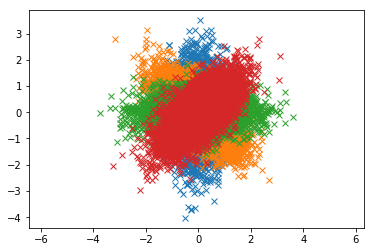

In [159]:
make_rotated_gaussians(4)

In [205]:
def gen_samples(params, dists):
    points = list()
    for dist in dists:
        points.append(_make_dist(params, dist))
    return points

def _make_dist(p_global, p_local):
    N = p_local.get('num_samples', p_global['num_samples'])
    if p_local['type'] == 'gaussian':
        x, y = np.random.multivariate_normal(p_local['mean'], p_local['cov'], N).T
    if 'transforms' in p_local.keys():
        if type(p_local['transforms']) != 'list':
            p_local['transforms'] = [p_local['transforms']]
        for transform in p_local['transforms']:
            if transform == 'rotate':
                x, y = _rotate_points(x, y, p_local['theta'])
    return x, y

In [206]:
test_global = {
    'num_samples': 5000
}

test_dists = [
    {
        'name': 'Big Blue',
        'type': 'gaussian',
        'mean': [0, 0],
        'cov': [[.2, 0], [0, 1]]
    },
    {
        'name': 'Big Orange',
        'type': 'gaussian',
        'mean': [0, 0],
        'transforms': 'rotate',
        'cov': [[1, 0], [0, .2]],
        'theta': (np.pi / 6)
    }
]

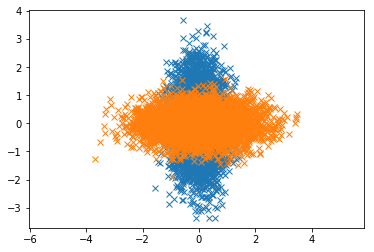

In [209]:
for x, y in gen_samples(test_global, test_dists):
    plt.plot(x, y, 'x')
    plt.axis('equal')
plt.show()